In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
# Veri setini yükleme
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)


In [3]:
# Missing değerleri belirleme ve yerine ortalama değer atama
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

In [4]:
# Veri setini standartlaştırma
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Naive Bayes Sonuçları:
[[119  32]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



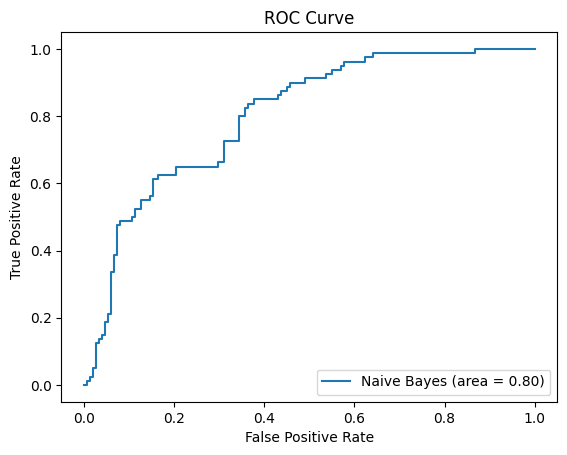

In [6]:
from sklearn.naive_bayes import GaussianNB

# Modeli eğitme
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahmin yapma
y_pred_nb = nb.predict(X_test)

# Sonuçları raporlama
print("Naive Bayes Sonuçları:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# ROC Curve
y_prob_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_score(y_test, y_prob_nb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


K-Nearest Neighbors Sonuçları (En iyi k=11):
[[122  29]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       151
           1       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



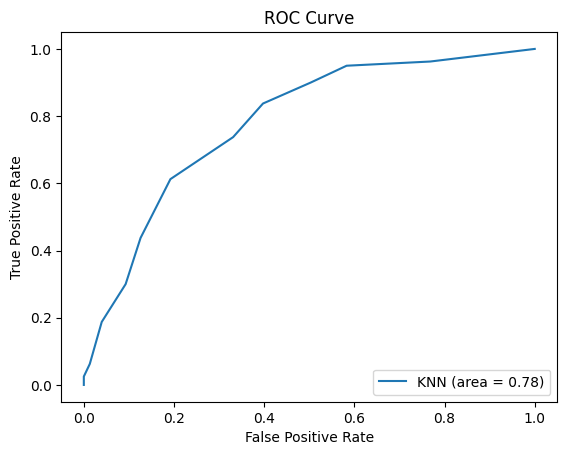

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# K değerleri için Grid Search
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# En iyi k değeri ile modeli eğitme
best_k = knn_gscv.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Tahmin yapma
y_pred_knn = knn_best.predict(X_test)

# Sonuçları raporlama
print(f"K-Nearest Neighbors Sonuçları (En iyi k={best_k}):")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# ROC Curve
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_score(y_test, y_prob_knn))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# MLP Modeli eğitme
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, y_train)


c:\Users\sevva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300)

In [9]:
# MLP ile tahmin yapma
y_pred_mlp = mlp.predict(X_test)

In [10]:
# MLP Sonuçları raporlama
print("MLP Sonuçları:")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

MLP Sonuçları:
[[121  30]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



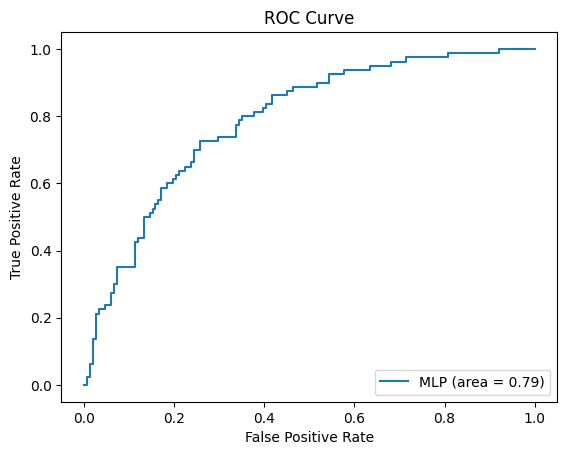

In [11]:

# ROC Curve
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.2f)' % roc_auc_score(y_test, y_prob_mlp))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:

# SVM Modeli eğitme
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [13]:

# SVM ile tahmin yapma
y_pred_svm = svm.predict(X_test)

# SVM Sonuçları raporlama
print("SVM Sonuçları:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Sonuçları:
[[127  24]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



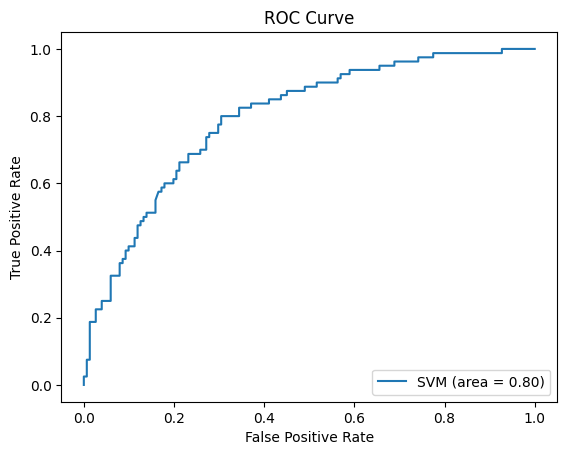

In [14]:



# ROC Curve
y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_score(y_test, y_prob_svm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
